In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importation des données du bitcoin (https://finance.yahoo.com/quote/BTC-EUR/history?p=BTC-EUR)

In [4]:
bitcoin = pd.read_csv('BTC-EUR.csv')
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166.0
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103.0
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826.0
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625.0


Observation de la valeur du bitcoin en fin de journée

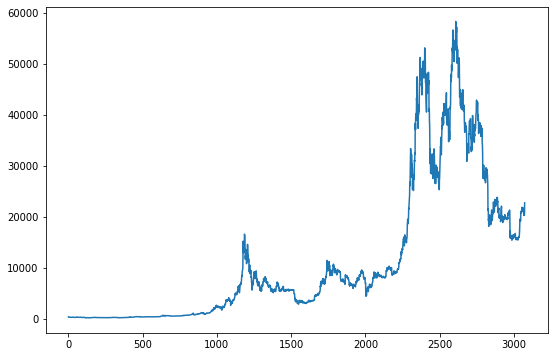

In [9]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

Nous constatons que nous n'avons pas de date en abscisse 

#Utilisation de la colonne Date comme index

In [11]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True )
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-11',
               '2023-02-12', '2023-02-13', '2023-02-14', '2023-02-15',
               '2023-02-16', '2023-02-17'],
              dtype='datetime64[ns]', name='Date', length=3076, freq=None)

Observation des données du bitcoin en 2019

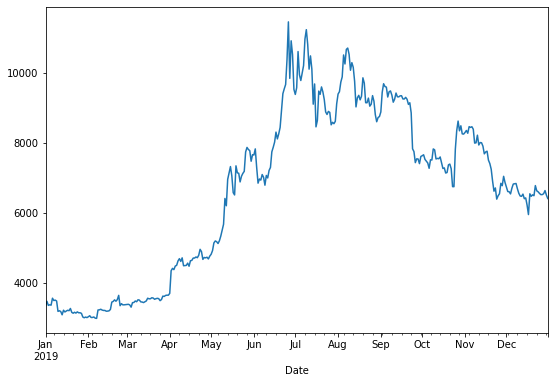

In [18]:
bitcoin.loc['2019']['Close'].plot(figsize=(9,6))
plt.show()

Observation des données du bitcoin en 2022

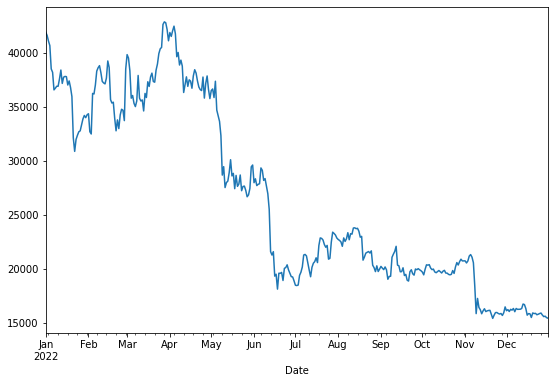

In [22]:
bitcoin.loc['2022']['Close'].plot(figsize=(9,6))
plt.show()

Observation des données du bitcoin en 2022 par mois

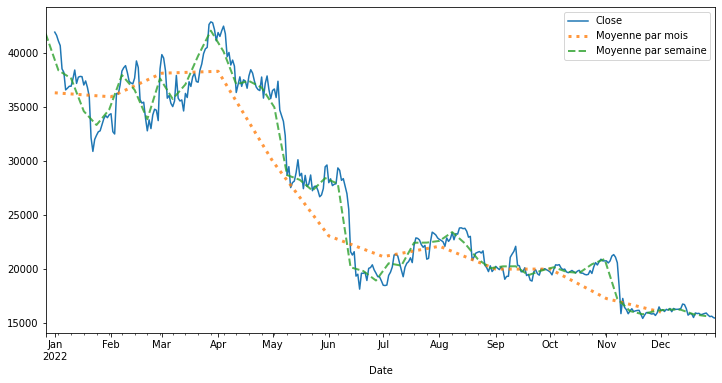

In [33]:
plt.figure(figsize=(12,6))
bitcoin.loc['2022', 'Close'].plot()
bitcoin.loc['2022', 'Close'].resample('M').mean().plot(label="Moyenne par mois", lw=3, ls=':', alpha=0.8)
bitcoin.loc['2022', 'Close'].resample('W').mean().plot(label="Moyenne par semaine", lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

Volatilité du bitcoin en 2022 en visualisant les données par semaines

<AxesSubplot:xlabel='Date'>

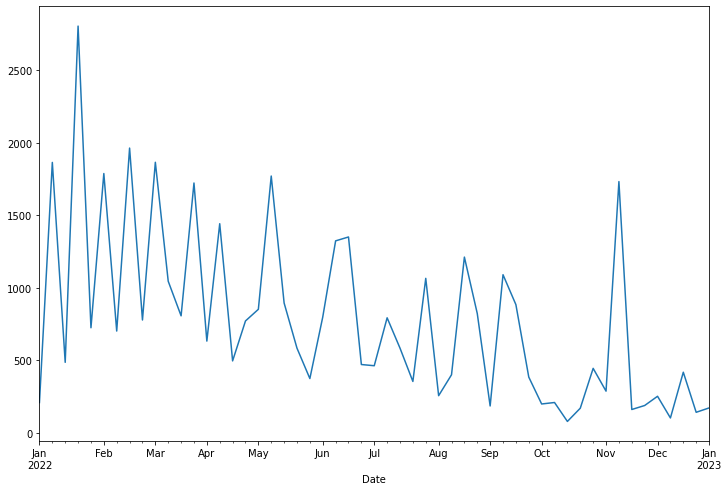

In [37]:
plt.figure(figsize=(12,8))
bitcoin.loc['2022', 'Close'].resample('W').std().plot()


On remarque que le bitcoin était très volatile en 2022

Evolution du bitcoin par semaine en 2022 avec les valeurs maximale et minimales

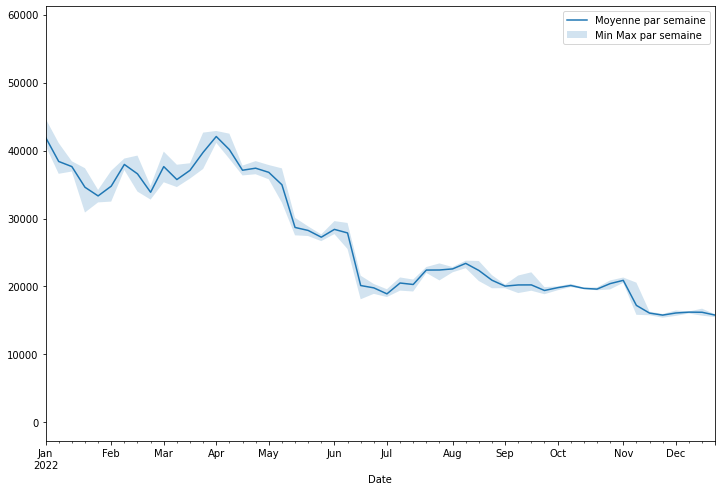

In [41]:
data = bitcoin['Close'].resample('W').agg(['mean','std','min','max'])
plt.figure(figsize=(12,8))
data['mean']['2022'].plot(label='Moyenne par semaine')
plt.fill_between(data.index, data['max'], data['min'], alpha=0.2, label='Min Max par semaine')
plt.legend()
plt.show()
